In [ ]:
!pip install emot
!pip install contractions
!pip install pyLDAvis
!pip install langdetect
!pip install spacy
!pip install openai
!pip install nltk wordcloud matplotlib
!pip install scikit-llm
!pip install seaborn
!python -m spacy download en_core_web_sm
!pip install opendatasets
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the 

2023-11-17 12:10:37.351198: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 12:10:37.351288: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 12:10:37.351337: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 12:10:37.365164: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-17 12:10:39.177980: W tensorflow/compiler/

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import ast

# Libraries for skllm setup
import os
import getpass
import openai
from skllm.config import SKLLMConfig
from sklearn.feature_extraction.text import TfidfVectorizer

# Library for summarization
from skllm.preprocessing import GPTSummarizer

# Library for translation
from skllm.preprocessing import GPTTranslator
from langdetect import detect

# for text preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
import contractions

nltk.download('punkt') # Downloads the Punkt tokenizer models
nltk.download('stopwords') # Downloads the list of stopwords
nltk.download('wordnet') # Downloads the WordNet lemmatizer data
nltk.download('vader_lexicon')

import spacy

# for sentiment analysis
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

AttributeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Titles with 875 or more reviews

In [ ]:
# Load file
df = pd.read_csv('2022-01-08.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,30549,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...
1,822,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...
2,13,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...
3,68448,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...
4,36218,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...


In [ ]:
df.count()

ID               21831
Name             21831
Year             21831
Rank             21831
Average          21831
Bayes average    21831
Users rated      21831
URL              21831
Thumbnail        21825
dtype: int64

In [ ]:
# Average number of users
avg_user_reviews = df['Users rated'].mean()
avg_user_reviews

866.9641335715268

In [ ]:
# Filter to games that have user reviews above 866
df_filtered = df[df['Users rated'] > avg_user_reviews]
df_filtered.count()

ID               3175
Name             3175
Year             3175
Rank             3175
Average          3175
Bayes average    3175
Users rated      3175
URL              3175
Thumbnail        3175
dtype: int64

In [ ]:
df.to_csv('E:/Documents/Eskwelabs Data/Sprint 4/bgg/df_filtered.csv', index=False)

# Dataset

In [ ]:
!pip install emot
!pip install contractions
!pip install pyLDAvis
!pip install langdetect
!pip install spacy
!pip install openai
!pip install nltk wordcloud matplotlib
!pip install scikit-llm
!pip install seaborn
!python -m spacy download en_core_web_sm

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

# Libraries for skllm setup
import os
import getpass
import openai
from skllm.config import SKLLMConfig

# Library for summarization
from skllm.preprocessing import GPTSummarizer

# Library for translation
from skllm.preprocessing import GPTTranslator
from langdetect import detect

# for text preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
import contractions

nltk.download('punkt') # Downloads the Punkt tokenizer models
nltk.download('stopwords') # Downloads the list of stopwords
nltk.download('wordnet') # Downloads the WordNet lemmatizer data

import spacy

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /Users/jobchua/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jobchua/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jobchua/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Cleaning

## 19 million reviews dataset

In [ ]:
#change directory
file =('/Users/jobchua/Downloads/bgg-19m-reviews.csv')
reviews_19m = pd.read_csv(file)

reviews_19m.head()

In [ ]:
reviews_19m = reviews_19m.drop('Unnamed: 0', axis=1)
reviews_19m.head()

In [ ]:
reviews_19m.shape

## Drop null comments

In [ ]:
df = reviews_19m.dropna(subset=['comment']).copy()
df.head()

In [ ]:
df.shape

In [ ]:
df.to_csv('/Users/jobchua/Downloads/df_S4G6.csv', index=False)

## drop titles below average number of reviews (875 reviews)

In [ ]:
df_875reviews = pd.read_csv('/Users/jobchua/Downloads/df_filtered.csv')
df_875reviews.head()

In [ ]:
df_875reviews.shape

In [ ]:
titles_id = df_875reviews['ID'].tolist()
titles_id[:5]

In [ ]:
def drop_title(id):
    for t in titles_id:
        if id == t:
            return id
        else:
            continue
    return None

In [ ]:
df.loc[:,'id_many_reviews'] = df['ID'].apply(drop_title)
df.head()

In [ ]:
df2B = df.dropna(subset='id_many_reviews').copy()
df2B.drop(columns='id_many_reviews', inplace=True)
df2B.head()

In [ ]:
df2.shape

In [ ]:
df2B.to_csv('/Users/jobchua/Downloads/df2B_S4G6.csv', index=False)

## drop non-english comments

In [ ]:
df2B.shape

(2616270, 5)

In [ ]:
df2B_sam = df2B.sample(10000, random_state=42)
df2B_sam.shape

(10000, 5)

In [ ]:
## Set your OpenAI API key
openai.api_key = getpass.getpass()
SKLLMConfig.set_openai_key(openai.api_key)

········


In [ ]:
# Helper function
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'en'

In [ ]:
# Apply the language detection function to the 'verified_reviews'
df2B_sam.loc[:,'lang'] = df2B_sam['comment'].apply(detect_language)
df2B_sam['lang'].value_counts()

lang
en       8671
de        167
es        153
fr        120
it         67
ca         65
da         62
pt         57
af         51
hu         49
ko         46
nl         42
tl         40
so         38
pl         37
sv         36
sw         36
cy         28
no         28
id         27
ro         20
vi         18
ja         17
ru         17
fi         15
zh-cn      14
et         13
tr         12
sl         10
zh-tw       8
lt          8
sk          8
hr          7
el          4
cs          2
uk          2
sq          2
th          2
lv          1
Name: count, dtype: int64

In [ ]:
df2B_sam.head()

,user,rating,comment,ID,name,lang
608048,acolyte,9.0,I think this is the game I wanted Defenders of...,127398,Legends of Andor,en
558241,Franchot,2.0,Dull and boring to play. Player interaction is...,148228,Splendor,en
193239,Feijee,10.0,Best gaming experience of my life!,161936,Pandemic Legacy: Season 1,en
292584,bluebright,8.0,"Enjoyable battle game, still fun with only 2 p...",70323,King of Tokyo,en
26497,PsyenceFyction,9.5,This is probably one of my most favorite games...,131357,Coup,en


In [ ]:
df3B = df2B_sam[df2B_sam['lang']=='en'].copy()
df3B.head()

,user,rating,comment,ID,name,lang
608048,acolyte,9.0,I think this is the game I wanted Defenders of...,127398,Legends of Andor,en
558241,Franchot,2.0,Dull and boring to play. Player interaction is...,148228,Splendor,en
193239,Feijee,10.0,Best gaming experience of my life!,161936,Pandemic Legacy: Season 1,en
292584,bluebright,8.0,"Enjoyable battle game, still fun with only 2 p...",70323,King of Tokyo,en
26497,PsyenceFyction,9.5,This is probably one of my most favorite games...,131357,Coup,en


In [ ]:
df3B.shape

(8671, 6)

In [ ]:
df3B.to_csv('/Users/jobchua/Downloads/df3B_S4G6.csv', index=False)

## drop duplicate

In [ ]:
duplicate = df3.duplicated()
duplicate.sum()

## drop number only comments

In [ ]:
numeric = df3B['comment'].astype(str).str.isnumeric()
numeric.sum()

64

In [ ]:
df3B = df3B[~numeric].copy()
df3B.shape

(8607, 6)

## drop white space only comments

In [ ]:
white_space = df3B['comment'].astype(str).str.isspace()
white_space.sum()

18

In [ ]:
df3B = df3B[~white_space].copy()
df3B.shape

(8589, 6)

## drop long comment lengths

Remove reviews with more than 600 characters because even though there are less of them they impact the model more by having more characters. Drop less than 10 characters as comments are unintelligeble.

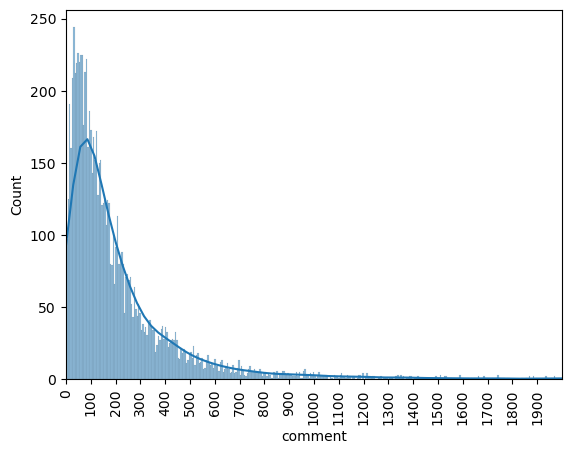

In [ ]:
sns.histplot(df3B['comment'].str.len(), bins=1000, kde=True)

plt.xlim(0,2000)
plt.xticks(range(0,2000,100), rotation=90)
plt.show()

In [ ]:
df3B[df3B['comment'].str.len() <= 5]['comment'].sample(10)

1651965      €15
1896182      2-6
1958588      $10
1914734      $20
1589257      3-5
775456       [*]
517806       $40
391875       6.5
2035711    20/35
1541676      2-4
Name: comment, dtype: object

In [ ]:
len(df3B[df3B['comment'].str.len() <= 5])

82

In [ ]:
# remove reviews with more than 600 characters because even though there are less of them they impact the model
# more by having more characters.
df4B = df3B[(df3B['comment'].str.len() <= 600) & (df3B['comment'].str.len() > 10)].copy()
df4B.shape

(7844, 6)

In [ ]:
df4B.to_csv('/Users/jobchua/Downloads/df4B_S4G6.csv', index=False)

# Data preprocessing

## Expand contractions

In [ ]:
def expand_contractions(input_string):
    expanded_text = contractions.fix(input_string)
    return expanded_text

In [ ]:
df4B.loc[:,'comment'] = df4B['comment'].apply(expand_contractions)
df5B = df4B.copy()

In [ ]:
df5B.to_csv('/Users/jobchua/Downloads/df5B_S4G6.csv', index=False)

## Tokenize

In [ ]:
df5B.loc[:,'comment'] = df5B['comment'].astype(str)

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Define a function for tokenization
def spacy_tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply tokenization
df5B.loc[:,'spacy_tokens'] = df5B['comment'].apply(spacy_tokenize_text)
df5B.head()

,user,rating,comment,ID,name,lang,spacy_tokens
608048,acolyte,9.0,I think this is the game I wanted Defenders of...,127398,Legends of Andor,en,"[I, think, this, is, the, game, I, wanted, Def..."
558241,Franchot,2.0,Dull and boring to play. Player interaction is...,148228,Splendor,en,"[Dull, and, boring, to, play, ., Player, inter..."
193239,Feijee,10.0,Best gaming experience of my life!,161936,Pandemic Legacy: Season 1,en,"[Best, gaming, experience, of, my, life, !]"
292584,bluebright,8.0,"Enjoyable battle game, still fun with only 2 p...",70323,King of Tokyo,en,"[Enjoyable, battle, game, ,, still, fun, with,..."
26497,PsyenceFyction,9.5,This is probably one of my most favorite games...,131357,Coup,en,"[This, is, probably, one, of, my, most, favori..."


In [ ]:
df6B = df5B.copy()
df6B.to_csv('/Users/jobchua/Downloads/df6B_S4G6.csv', index=False)

In [ ]:
df6B.shape

(7844, 7)

## Remove stopwords, punctuation, non-alphabetical, and emoticons

In [ ]:
# Set up stopwords
stop_words = set(stopwords.words('english'))

# Define function for noise removal
def preprocess(tokens):
    return [word for word in tokens if word.lower() not in stop_words
            and word not in string.punctuation
            and word.isalpha()
            and word not in UNICODE_EMOJI
            and word not in EMOTICONS_EMO] # alternatively, word.isalnum()

In [ ]:
# Apply noise removal
df6B.loc[:,'tokens_preprocess'] = df6B['spacy_tokens'].apply(preprocess)
df6B.head()

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess
608048,acolyte,9.0,I think this is the game I wanted Defenders of...,127398,Legends of Andor,en,"[I, think, this, is, the, game, I, wanted, Def...","[think, game, wanted, Defenders, Realm, game, ..."
558241,Franchot,2.0,Dull and boring to play. Player interaction is...,148228,Splendor,en,"[Dull, and, boring, to, play, ., Player, inter...","[Dull, boring, play, Player, interaction, nil,..."
193239,Feijee,10.0,Best gaming experience of my life!,161936,Pandemic Legacy: Season 1,en,"[Best, gaming, experience, of, my, life, !]","[Best, gaming, experience, life]"
292584,bluebright,8.0,"Enjoyable battle game, still fun with only 2 p...",70323,King of Tokyo,en,"[Enjoyable, battle, game, ,, still, fun, with,...","[Enjoyable, battle, game, still, fun, players]"
26497,PsyenceFyction,9.5,This is probably one of my most favorite games...,131357,Coup,en,"[This, is, probably, one, of, my, most, favori...","[probably, one, favorite, games, ever, Slap, s..."


In [ ]:
df7B = df6B.copy()
df7B.to_csv('/Users/jobchua/Downloads/df7B_S4G6.csv', index=False)

## Lemmatize

In [ ]:
# Define a function for lemmatization
def spacy_lemmatize(tokens):
    doc = nlp(' '.join(tokens))
    return [token.lemma_ for token in doc]

In [ ]:

# Apply lemmatization
df7B.loc[:,'spacy_lemmatize'] = df7B['tokens_preprocess'].apply(spacy_lemmatize)
df7B.head()

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize
608048,acolyte,9.0,I think this is the game I wanted Defenders of...,127398,Legends of Andor,en,"[I, think, this, is, the, game, I, wanted, Def...","[think, game, wanted, Defenders, Realm, game, ...","[think, game, want, Defenders, Realm, game, mu..."
558241,Franchot,2.0,Dull and boring to play. Player interaction is...,148228,Splendor,en,"[Dull, and, boring, to, play, ., Player, inter...","[Dull, boring, play, Player, interaction, nil,...","[dull, boring, play, Player, interaction, nil,..."
193239,Feijee,10.0,Best gaming experience of my life!,161936,Pandemic Legacy: Season 1,en,"[Best, gaming, experience, of, my, life, !]","[Best, gaming, experience, life]","[good, gaming, experience, life]"
292584,bluebright,8.0,"Enjoyable battle game, still fun with only 2 p...",70323,King of Tokyo,en,"[Enjoyable, battle, game, ,, still, fun, with,...","[Enjoyable, battle, game, still, fun, players]","[enjoyable, battle, game, still, fun, player]"
26497,PsyenceFyction,9.5,This is probably one of my most favorite games...,131357,Coup,en,"[This, is, probably, one, of, my, most, favori...","[probably, one, favorite, games, ever, Slap, s...","[probably, one, favorite, game, ever, slap, su..."


In [ ]:
df8B = df7B.copy()
df8B.to_csv('/Users/jobchua/Downloads/df8B_S4G6.csv', index=False)

In [ ]:
df8B.shape

(7844, 9)

## DF with Low Ratings (1-6)

In [ ]:
np.ceil(df8B['rating'])

608048      9.0
558241      2.0
193239     10.0
292584      8.0
26497      10.0
           ... 
2494135     8.0
80722       8.0
2134036    10.0
1082733     7.0
647582      7.0
Name: rating, Length: 7844, dtype: float64

In [ ]:
low_ratings = [1,2,3,4,5,6]
df_lowB = df8B[df8B['rating'].isin(low_ratings)].copy()
df_lowB.shape

(2169, 9)

In [ ]:
df_lowB.to_csv('/Users/jobchua/Downloads/df_lowB_S4G6.csv', index=False)

## DF with High Ratings (7-10)

In [ ]:
high_ratings = [7,8,9,10]
df_highB = df8B[df8B['rating'].isin(high_ratings)].copy()
df_highB.shape

(4181, 9)

In [ ]:
df_highB.to_csv('/Users/jobchua/Downloads/df_highB_S4G6.csv', index=False)

# Text Summarization EDA

In [ ]:
satisfied = df_highB['comment'].sample(100, random_state=42).tolist()
satisfied[:5]

In [ ]:
dissatisfied = df_lowB['comment'].sample(100, random_state=42).tolist()
dissatisfied[:5]

In [ ]:
s = GPTSummarizer(openai_model='gpt-3.5-turbo', max_words=50, focus='speaker')
pos_summary = s.fit_transform([' '.join(satisfied)])[0]
pos_summary

In [ ]:
neg_summary = s.fit_transform([' '.join(dissatisfied)])[0]
neg_summary

Positive (50 words):
'More than classic and nostalgic battlefield game. Light Strategy Team Very pleasant gameplay, however, it is happened several times that the initial order of the turn decided about the victory, which was quite a frustrating experience. Clear and quick. Actually found this more appealing than Puerto Rico. Played it 2/28 - this game is really fun! We all enjoyed ourselves, made up stories, named the stars. It was a good time! The go-to game for my family -simple, engaging, limited downtime, great replay-ability. What is not to like? A highly pleasing, very efficient and elegant card game that uses the "I cut; you choose" mechanic that is not seen that much in games and always adds natural tension. Plays quick and looks beautiful on table. It is not particularly deep by any means, but as a 2-player card game of daring and wits, this one does it pretty much perfect. Luxor is a light family game, playing nice and fast. Very good gateway and very easy to learn. Although rules are simple you have some strategy in it, which is a movement card management - and this is where this game really shines. This one has been a riot in larger groups! It definitely plays better the more people you have. Bring on the shouting and chaos of the market! 2008 Birthday gift from Mom and Dad. Custom board and playmats You need a whole life and a big room, these are the problems I like Trains. =] A very enjoyable, easy-to-learn game which is good for enticing people who are not "into" board games. Having played the vanilla version, I can say that the Europe version adds enough new content to make the game much more strategic and adds a bit more challenge. Very good. =] A funny game of collecting nobles\' heads. The inside historical jokes/references are hilarious. The game can become stale after too many plays in a row however. Funny game, with cool pieces. The players have to deal swiftly with the lack of resources, and choose if they will let their villagers starve or not each round. The theme is very well developed. Civilization building perfection in just a few cards and cubes. Dropping the map in order to focus on the key aspects of just what makes a great civilization really'

Negative (50 words):
'For a vicious luck ridden "place a tile and hope" game, it is one of the best. Not one to play that often, but if you are tired, want a laugh, and only have 30mins, then this is a good candidate to play. I definitely like the 2nd edition better in terms of artwork and gameplay. They made a lot of changes. I wanted to play the 1st edition to compare, and to try out things that were taken out of the game, such as the Magic Way cards. I think the updated changes were a good choice. The 1st edition just seems more blasé for some reason. 2-5 players Great design and beautiful artwork. It just is not my kind of game exactly. I can see why others love it though. It feels a bit too solo for me. Parallel play with sometimes little incentive to do anything against/with other players. It slowed us down and it cost us a lot to move forward without asking for less than 3 clues, maybe because the theme did not end up making us get caught up in the game like the forgotten cabin  See www.brettspillguiden.no  (Norwegian only. Sorry!) Reductive card game that is still better than Uno. I played this as a kid, quite a lot. I understand the game is well designed, but just like most euros, sacrifices fun for the sake of "design." I do like the random card element though. A classic experience for people who have not yet "solved" the game. Can make for some memorable moments, normally revolving around people losing their entire fortunes in a single turn. Fun for the right audience. This is a dice fest and has not aged well at all especially now that we have Empire of the sun. We tried with 8 players, and it got pretty boring pretty quickly. We all concurred (after only 1 playing mind you) that you do not need so many ingredient and so many menu items. It would probably be better with like 4-6, but I will probably never play again to try. almost no interactive with other players Has some interesting elements, but the game just did not click with me. Do not buy. Dis'

Positive (25 words):
'More than classic and nostalgic battlefield game. Light Strategy Team Very pleasant gameplay, however, it is happened several times that the initial order of the turn decided about the victory, which was quite a frustrating experience. Clear and quick. Actually found this more appealing than Puerto Rico. Played it 2/28 - this game is really fun! We all enjoyed ourselves, made up stories, named the stars. It was a good time! The go-to game for my family -simple, engaging, limited downtime, great replay-ability. A highly pleasing, very efficient and elegant card game that uses the "I cut; you choose" mechanic that is not seen that much in games and always adds natural tension. Luxor is a light family game, playing nice and fast. Very good gateway and very easy to learn. Although rules are simple you have some strategy in it, which is a movement card management - and this is where this game really shines. This one has been a riot in larger groups! It definitely plays better the more people you have. Bring on the shouting and chaos of the market! 2008 Birthday gift from Mom and Dad. Custom board and playmats You need a whole life and a big room, these are the problems I like Trains. =] A very enjoyable, easy-to-learn game which is good for enticing people who are not "into" board games. Having played the vanilla version, I can say that the Europe version adds enough new content to make the game much more strategic and adds a bit more challenge. Very good. =] A funny game of collecting nobles\' heads. The inside historical jokes/references are hilarious. The game can become stale after too many plays in a row however. Funny game, with cool pieces. The players have to deal swiftly with the lack of resources, and choose if they will let their villagers starve or not each round. The theme is very well developed. Civilization building perfection in just a few cards and cubes. Dropping the map in order to focus on the key aspects of just what makes a great civilization really makes this game stand out. Will it survive once Nations is released? I think so. It just will not get as much love as it rightly deserves. I think I like this setting more that Black Plague. It feels'

Negative (25 words):
'For a luck-based game, it is one of the best. The 2nd edition is better in terms of artwork and gameplay. The 1st edition seems more blasé. It feels solo with little incentive to interact with other players. The game can be slow and costly. The factions combination is unbalanced. The game is not as fun as smashing it up. The iOS version makes it easy to play. A great game with 2 or 3 people. The theme could be deeper. Interesting game hampered by a horrible combat system. The game did not grab me. A classic experience for people who have not yet "solved" the game. This game has not aged well. The game is okay, but I am not really enthusiastic about it. A good looking family marbles game. A fairly straightforward worker placement game. This game is pretty fun solo. A lot of fun juggling hard knocks and support. This game did not grab me. A boring trivia game. It is like Patchwork but different. A fun small game. An excellent dice rolling game. A clever little two-player card game. A solid filler. A brain burn-y puzzle. Nice filler. A bit boring bidding game. A very smart game design that lacks the fun factor. The game is too fiddly with too many pieces. A coop superhero card game. Another co-operation game with a Star Trek theme.'

# Sentiment Wordcloud EDA

In [ ]:
# Initialize the MultiLabelZeroShotGPTClassifier
clf = MultiLabelZeroShotGPTClassifier(openai_model="gpt-3.5-turbo",
                                      max_labels=3)

# Define the candidate labels
candidate_labels = [
    "Excitement",
    "Frustration",
    "Joy",
    "Curiosity",
    "Disappointment",
    "Competitiveness",
    "Nostalgia",
    "Satisfaction",
    "Confusion",
    "Connection"
]

# Fit the classifier with the candidate labels
clf.fit(None, [candidate_labels])

In [ ]:
mlzs_df = df8B.copy()

# Filter the DataFrame to only include reviews that are more than 100 characters in length
mlzs_filtered = mlzs_df[mlzs_df['comment'].str.len() > 100].copy()

# Select random rows from the filtered DataFrame
mlzs_sample = mlzs_filtered.sample(100, random_state=42)

mlzs_sample['gpt_topics'] = clf.predict(mlzs_sample['comment'])
display(mlzs_sample[['comment','gpt_topics']])

In [ ]:
df9 = mlzs_sample.copy()
df9.head()

In [ ]:
df9_low = df9[(df9['rating'] >= 1.00) & (df9['rating'] <= 6.99)]
df9_low.head()

In [ ]:
df9_high = df9[(df9['rating'] >= 7.00) & (df9['rating'] <= 10.01)]
df9_high.head()

In [ ]:
pos_sentiment = df9_high['gpt_topics'].tolist()
pos_words = " ".join(map(str, pos_sentiment))

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(pos_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')

# Show the plot
plt.show()

In [ ]:
neg_sentiment = df9_low['gpt_topics'].tolist()
neg_words = " ".join(map(str, neg_sentiment))

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(neg_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')

# Show the plot
plt.show()

In [ ]:
# to fix bug of Jupyter notebooks icons disappering when pyLDAvis is installed https://github.com/bmabey/pyLDAvis/issues/162
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))

In [ ]:
import pandas as pd
# import opendatasets as od

# Libraries for skllm setup
import os
import getpass
import openai
from skllm.config import SKLLMConfig
from sklearn.feature_extraction.text import TfidfVectorizer

# Library for summarization
# from skllm.preprocessing import GPTSummarizer

# Library for translation
from skllm.preprocessing import GPTTranslator
from langdetect import detect

# for text preprocessing
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

import contractions
import spacy

# nltk.download('punkt') # Downloads the Punkt tokenizer models
# nltk.download('stopwords') # Downloads the list of stopwords
# nltk.download('wordnet') # Downloads the WordNet lemmatizer data


import pyLDAvis
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()

# for visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# import the latest boardgame reviews dataset

df = pd.read_csv('data/bgg-19m-reviews.csv')
# df = pd.read_csv('E:/Documents/Eskwelabs Data/Sprint 4/bgg/bgg-19m-reviews.csv')
df # commented takes a while to load

,Unnamed: 0,user,rating,comment,ID,name
0,0,Torsten,10.0,NaN,30549,Pandemic
1,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
3,3,Mike Mayer,10.0,NaN,30549,Pandemic
4,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic
...,...,...,...,...,...,...
18964802,18964802,Ceryon,3.1,NaN,1752,Haps
18964803,18964803,Gregarius,2.0,"I hated this game. Too complicated to set up, ...",1752,Haps
18964804,18964804,Lajos,2.0,Sold in Geekauction for 3 GG.,1752,Haps
18964805,18964805,Imagine,1.0,This game is not for me - I just didn&#039;t g...,1752,Haps


In [ ]:
# Get to know the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18964807 entries, 0 to 18964806
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   user        object 
 2   rating      float64
 3   comment     object 
 4   ID          int64  
 5   name        object 
dtypes: float64(1), int64(2), object(3)
memory usage: 868.1+ MB


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,user,rating,comment,ID,name
0,Torsten,10.0,NaN,30549,Pandemic
1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
3,Mike Mayer,10.0,NaN,30549,Pandemic
4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic


In [ ]:
# Know the shape of the dataset in terms of number of rows and columns

df.shape

(18964807, 5)

In [ ]:
# Remove null comments as they will not contribute to the NLP workflow

df.dropna(subset=['comment'], inplace=True)

In [ ]:
# Count comments after removing null. we are left with 3.3M comments

df['comment'].count()

3368618

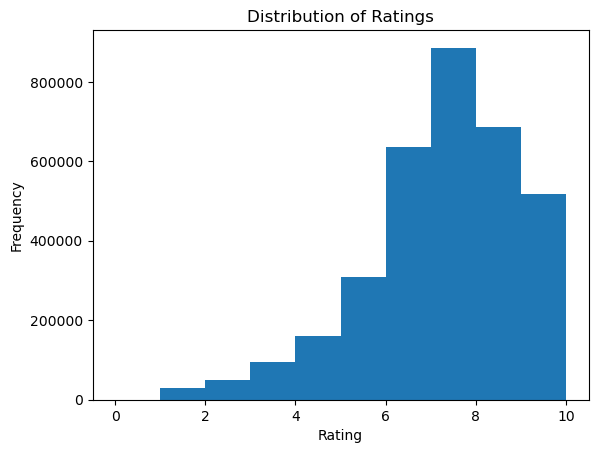

In [ ]:
# Visualize the distribution of ratings for the remaining reviews

plt.hist(df['rating'], bins=10, edgecolor='none')  # You can adjust the number of bins as needed
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df.describe()

,rating,ID
count,3.368618e+06,3.368618e+06
mean,6.905662e+00,9.135392e+04
std,1.785285e+00,9.121462e+04
min,1.401300e-45,1.000000e+00
25%,6.000000e+00,7.349000e+03
50%,7.000000e+00,5.086200e+04
75%,8.000000e+00,1.663840e+05
max,1.000000e+01,3.509920e+05


Average rating for the games are around rating of 7.0

In [ ]:
# randomly sample 1% of the dataset for relatively quicker processing

sample_fraction = 0.0002  # Adjust this fraction based on your needs
sampled_df = df.sample(frac=sample_fraction, random_state=13)  # Setting a seed for reproducibility

In [ ]:
sampled_df.shape

(674, 5)

# Sentiment Analysis

## Using TextBlob

In [ ]:
# df = pd.read_csv('df8B_S4G6.csv')

In [ ]:
# Rule-based annotation function
def rule_patterns_annotation(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the rule-based annotation function to the dataset
df['rule_patterns_sentiment'] = (df['comment']
                                 .str.lower()
                                 .apply(rule_patterns_annotation))

df.head(10)

NameError: ignored

## Vader Sentiment Intensity Analyzer

In [ ]:
# Create a SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Apply the analyzer to each comment and create a new column for sentiment scores
df['compound'] = df['comment'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiments based on the compound score
df['sentiment'] = df['compound'].apply(lambda score: 'positive' if score >= 0 else 'negative')

# Display the DataFrame with sentiment scores and classifications
print(df[['comment', 'compound', 'sentiment']])

In [ ]:
df.head()

In [ ]:
# df.to_csv('sentiment_analysis_textblob_vader.csv', index=False)

## Sentiment Analysis Visualization

In [ ]:
# Create a countplot for TextBlob sentiments
plt.figure(figsize=(10, 5))
sns.countplot(x='rule_patterns_sentiment', data=df, palette='viridis')
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Create a countplot for VADER sentiments
plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame with a 'sentiment' column
positive_text = ' '.join(df[df['rule_patterns_sentiment'] == 'Positive']['comment'])
negative_text = ' '.join(df[df['rule_patterns_sentiment'] == 'Negative']['comment'])
neutral_text = ' '.join(df[df['rule_patterns_sentiment'] == 'Neutral']['comment'])

# Define color maps
positive_cmap = ListedColormap(['green'])
negative_cmap = ListedColormap(['red'])
neutral_cmap = ListedColormap(['yellow'])

# Function to generate and plot a word cloud with specified colormap
def generate_wordcloud(text, title, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and plot word clouds for each sentiment with specified colormap
generate_wordcloud(positive_text, 'Positive Sentiment Word Cloud', positive_cmap)
generate_wordcloud(negative_text, 'Negative Sentiment Word Cloud', negative_cmap)
generate_wordcloud(neutral_text, 'Neutral Sentiment Word Cloud', neutral_cmap)

# EDA

In [ ]:
#Load files if needed
# df_high = pd.read_csv('E:/Documents/Google Drive/Eskwelabs/Sprint 4/Group_6_Team_Siomai_Rice/Sprint 4 Project/datasets/df_highB_S4G6.csv')
# df_low = pd.read_csv('E:/Documents/Google Drive/Eskwelabs/Sprint 4/Group_6_Team_Siomai_Rice/Sprint 4 Project/datasets/df_lowB_S4G6.csv')
# df7 = pd.read_csv('E:/Documents/Google Drive/Eskwelabs/Sprint 4/Group_6_Team_Siomai_Rice/Sprint 4 Project/datasets/df8B_S4G6.csv')

df7 = df8B.copy()
df_high = df_highB.copy()
df_low = df_lowB.copy()

In [ ]:
df7

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize
0,acolyte,9.0,I think this is the game I wanted Defenders of...,127398,Legends of Andor,en,"['I', 'think', 'this', 'is', 'the', 'game', 'I...","['think', 'game', 'wanted', 'Defenders', 'Real...","['think', 'game', 'want', 'Defenders', 'Realm'..."
1,Franchot,2.0,Dull and boring to play. Player interaction is...,148228,Splendor,en,"['Dull', 'and', 'boring', 'to', 'play', '.', '...","['Dull', 'boring', 'play', 'Player', 'interact...","['dull', 'boring', 'play', 'Player', 'interact..."
2,Feijee,10.0,Best gaming experience of my life!,161936,Pandemic Legacy: Season 1,en,"['Best', 'gaming', 'experience', 'of', 'my', '...","['Best', 'gaming', 'experience', 'life']","['good', 'gaming', 'experience', 'life']"
3,bluebright,8.0,"Enjoyable battle game, still fun with only 2 p...",70323,King of Tokyo,en,"['Enjoyable', 'battle', 'game', ',', 'still', ...","['Enjoyable', 'battle', 'game', 'still', 'fun'...","['enjoyable', 'battle', 'game', 'still', 'fun'..."
4,PsyenceFyction,9.5,This is probably one of my most favorite games...,131357,Coup,en,"['This', 'is', 'probably', 'one', 'of', 'my', ...","['probably', 'one', 'favorite', 'games', 'ever...","['probably', 'one', 'favorite', 'game', 'ever'..."
...,...,...,...,...,...,...,...,...,...
7839,operamang,8.0,LAST PLAY: Apr 2017 Started introducing this ...,10206,Make 'n' Break,en,"['LAST', 'PLAY', ':', 'Apr', '2017', ' ', 'Sta...","['LAST', 'PLAY', 'Apr', 'Started', 'introducin...","['last', 'play', 'Apr', 'start', 'introduce', ..."
7840,Jumpman78,8.0,Sushi Go goes to the next level with tons of n...,192291,Sushi Go Party!,en,"['Sushi', 'Go', 'goes', 'to', 'the', 'next', '...","['Sushi', 'Go', 'goes', 'next', 'level', 'tons...","['Sushi', 'Go', 'go', 'next', 'level', 'ton', ..."
7841,Silverleaf,10.0,One of the best Solitaire systems available an...,1608,Ambush!,en,"['One', 'of', 'the', 'best', 'Solitaire', 'sys...","['One', 'best', 'Solitaire', 'systems', 'avail...","['one', 'good', 'solitaire', 'system', 'availa..."
7842,skraem,6.5,"3+ Plays. Decent game. Nice puzzle, decent g...",169426,Roll Player,en,"['3', '+', 'Plays', '.', ' ', 'Decent', 'game'...","['Plays', 'Decent', 'game', 'Nice', 'puzzle', ...","['play', 'Decent', 'game', 'Nice', 'puzzle', '..."


In [ ]:
df_high

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize
0,acolyte,9.0,I think this is the game I wanted Defenders of...,127398,Legends of Andor,en,"['I', 'think', 'this', 'is', 'the', 'game', 'I...","['think', 'game', 'wanted', 'Defenders', 'Real...","['think', 'game', 'want', 'Defenders', 'Realm'..."
1,Feijee,10.0,Best gaming experience of my life!,161936,Pandemic Legacy: Season 1,en,"['Best', 'gaming', 'experience', 'of', 'my', '...","['Best', 'gaming', 'experience', 'life']","['good', 'gaming', 'experience', 'life']"
2,bluebright,8.0,"Enjoyable battle game, still fun with only 2 p...",70323,King of Tokyo,en,"['Enjoyable', 'battle', 'game', ',', 'still', ...","['Enjoyable', 'battle', 'game', 'still', 'fun'...","['enjoyable', 'battle', 'game', 'still', 'fun'..."
3,Matthias_K,8.0,To me this feels a bit like Lords of Waterdeep...,156566,Lords of Xidit,en,"['To', 'me', 'this', 'feels', 'a', 'bit', 'lik...","['feels', 'bit', 'like', 'Lords', 'Waterdeep',...","['feel', 'bit', 'like', 'Lords', 'Waterdeep', ..."
4,Mardyr,10.0,"Ready to play Sleeved, Mayday Premium",146791,Shadows of Brimstone: City of the Ancients,en,"['Ready', 'to', 'play', 'Sleeved', ',', 'Mayda...","['Ready', 'play', 'Sleeved', 'Mayday', 'Premium']","['ready', 'play', 'sleeve', 'Mayday', 'Premium']"
...,...,...,...,...,...,...,...,...,...
4176,Romdeau,7.0,"I like this game, I could just never find anyo...",822,Carcassonne,en,"['I', 'like', 'this', 'game', ',', 'I', 'could...","['like', 'game', 'could', 'never', 'find', 'an...","['like', 'game', 'could', 'never', 'find', 'an..."
4177,operamang,8.0,LAST PLAY: Apr 2017 Started introducing this ...,10206,Make 'n' Break,en,"['LAST', 'PLAY', ':', 'Apr', '2017', ' ', 'Sta...","['LAST', 'PLAY', 'Apr', 'Started', 'introducin...","['last', 'play', 'Apr', 'start', 'introduce', ..."
4178,Jumpman78,8.0,Sushi Go goes to the next level with tons of n...,192291,Sushi Go Party!,en,"['Sushi', 'Go', 'goes', 'to', 'the', 'next', '...","['Sushi', 'Go', 'goes', 'next', 'level', 'tons...","['Sushi', 'Go', 'go', 'next', 'level', 'ton', ..."
4179,Silverleaf,10.0,One of the best Solitaire systems available an...,1608,Ambush!,en,"['One', 'of', 'the', 'best', 'Solitaire', 'sys...","['One', 'best', 'Solitaire', 'systems', 'avail...","['one', 'good', 'solitaire', 'system', 'availa..."


In [ ]:
df_low

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize
0,Franchot,2.0,Dull and boring to play. Player interaction is...,148228,Splendor,en,"['Dull', 'and', 'boring', 'to', 'play', '.', '...","['Dull', 'boring', 'play', 'Player', 'interact...","['dull', 'boring', 'play', 'Player', 'interact..."
1,boleh,6.0,Carcassonne: South Seas is an interesting spin...,147303,Carcassonne: South Seas,en,"['Carcassonne', ':', 'South', 'Seas', 'is', 'a...","['Carcassonne', 'South', 'Seas', 'interesting'...","['Carcassonne', 'South', 'Seas', 'interesting'..."
2,SPBTooL,5.0,Fun and thematic press your luck game where ev...,43868,The Adventurers: The Temple of Chac,en,"['Fun', 'and', 'thematic', 'press', 'your', 'l...","['Fun', 'thematic', 'press', 'luck', 'game', '...","['fun', 'thematic', 'press', 'luck', 'game', '..."
3,Estragon,6.0,"Completely unoriginal, pretty, fast. I enjoy t...",38386,A Castle for All Seasons,en,"['Completely', 'unoriginal', ',', 'pretty', ',...","['Completely', 'unoriginal', 'pretty', 'fast',...","['completely', 'unoriginal', 'pretty', 'fast',..."
4,Bond8089,5.0,Initial Impressions: ---------------------- Fo...,155708,Tiny Epic Defenders,en,"['Initial', 'Impressions', ':', '-------------...","['Initial', 'Impressions', 'felt', 'like', 'si...","['initial', 'Impressions', 'feel', 'like', 'si..."
...,...,...,...,...,...,...,...,...,...
2164,Waylander1,6.0,A nice little roll and write. I think I like ...,240225,Roll to the Top!,en,"['A', 'nice', 'little', 'roll', 'and', 'write'...","['nice', 'little', 'roll', 'write', 'think', '...","['nice', 'little', 'roll', 'write', 'think', '..."
2165,Victor Mancha,3.0,"The story is boring, the grinding is way too m...",264220,Tainted Grail: The Fall of Avalon,en,"['The', 'story', 'is', 'boring', ',', 'the', '...","['story', 'boring', 'grinding', 'way', 'much',...","['story', 'boring', 'grind', 'way', 'much', 'c..."
2166,GerryHeidenreich,6.0,"Wife & I were turned off by the setup time, th...",10630,Memoir '44,en,"['Wife', '&', 'I', 'were', 'turned', 'off', 'b...","['Wife', 'turned', 'setup', 'time', 'theme', '...","['Wife', 'turn', 'setup', 'time', 'theme', 'ap..."
2167,Heyswyndon,4.0,I play this with my young kids. Other than th...,1219,Labyrinth,en,"['I', 'play', 'this', 'with', 'my', 'young', '...","['play', 'young', 'kids', 'find', 'game', 'cut...","['play', 'young', 'kid', 'find', 'game', 'cute..."


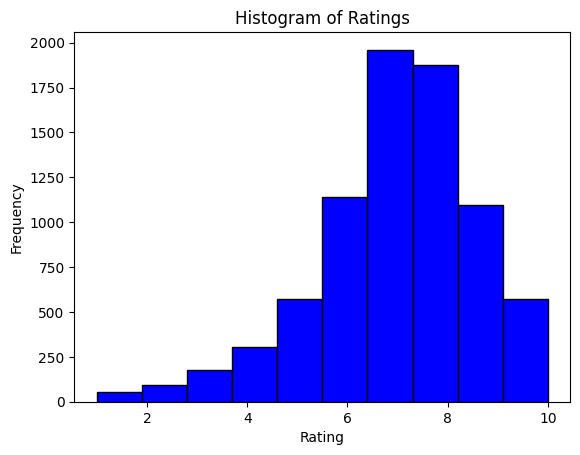

In [ ]:
#checking if samples still have distribution
# Plotting histogram
plt.hist(df7['rating'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# Display the plot
plt.show()

# N-grams Analysis

N-grams are continuous sequences of 'n' items from a text. Bigrams are 2-grams, which means they're pairs of words. By analyzing bigrams, we get a glimpse into common word pairs or phrases in the dataset.

We will use `nltk.bigrams` to generate bigrams based on tokens.

In [ ]:
# Define the function to generate n-grams from the list of spacy lemmatized tokens
def generate_ngrams(lemmatized_tokens, n):
    ngrams = zip(*[lemmatized_tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# Define the function to apply the generate_ngrams function to each row
def process_row(row, n):
    lemmatized_tokens = row['cleaned_lemmatize']
    return generate_ngrams(lemmatized_tokens, n)

# Define the function to clean the spacy_lemmatize column
def clean_tokens(lemmatized_tokens_str):
    lemmatized_tokens = ast.literal_eval(lemmatized_tokens_str)
    return [token.strip(" ,") for token in lemmatized_tokens]

## Pre-process, Set source df

### Entire dataset

In [ ]:
# randomly sample if needed
sample_fraction = 1 # Adjust this fraction based on your needs
sampled_df = df7.sample(frac=sample_fraction, random_state=13)  # Setting a seed for reproducibility
sampled_df.shape

(7844, 9)

In [ ]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
sampled_df_en_ngram = sampled_df.copy()
sampled_df_en_ngram.head()

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize
7308,AmandaDesignsGames,8.0,A clever take on the Legacy trend (although co...,203427,Fabled Fruit,en,"['A', 'clever', 'take', 'on', 'the', 'Legacy',...","['clever', 'take', 'Legacy', 'trend', 'althoug...","['clever', 'take', 'Legacy', 'trend', 'althoug..."
5309,Hugin,8.0,A good game to have to diversify your game typ...,2987,Pirate's Cove,en,"['A', 'good', 'game', 'to', 'have', 'to', 'div...","['good', 'game', 'diversify', 'game', 'types',...","['good', 'game', 'diversify', 'game', 'type', ..."
525,RodJohnsonSays,8.0,"Great party game. Quick, easy to learn, easy t...",155362,Ca$h 'n Guns (Second Edition),en,"['Great', 'party', 'game', '.', 'Quick', ',', ...","['Great', 'party', 'game', 'Quick', 'easy', 'l...","['great', 'party', 'game', 'Quick', 'easy', 'l..."
5746,pulla,5.0,Though I appreciate the art-mocking part I dis...,118,Modern Art,en,"['Though', 'I', 'appreciate', 'the', 'art', '-...","['Though', 'appreciate', 'art', 'mocking', 'pa...","['though', 'appreciate', 'art', 'mock', 'part'..."
2755,metonymo,4.0,"The game is straightforward, has a feel of pro...",98527,Gloom of Kilforth: A Fantasy Quest Game,en,"['The', 'game', 'is', 'straightforward', ',', ...","['game', 'straightforward', 'feel', 'progressi...","['game', 'straightforward', 'feel', 'progressi..."


In [ ]:
%%time
# Apply clean_tokens to the 'spacy_lemmatize' column in the 'new' DataFrame
sampled_df_en_ngram['cleaned_lemmatize'] = sampled_df_en_ngram['spacy_lemmatize'].apply(clean_tokens)
sampled_df_en_ngram.head()

CPU times: total: 219 ms
Wall time: 220 ms


,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize,cleaned_lemmatize
7308,AmandaDesignsGames,8.0,A clever take on the Legacy trend (although co...,203427,Fabled Fruit,en,"['A', 'clever', 'take', 'on', 'the', 'Legacy',...","['clever', 'take', 'Legacy', 'trend', 'althoug...","['clever', 'take', 'Legacy', 'trend', 'althoug...","[clever, take, Legacy, trend, although, comple..."
5309,Hugin,8.0,A good game to have to diversify your game typ...,2987,Pirate's Cove,en,"['A', 'good', 'game', 'to', 'have', 'to', 'div...","['good', 'game', 'diversify', 'game', 'types',...","['good', 'game', 'diversify', 'game', 'type', ...","[good, game, diversify, game, type, contain, f..."
525,RodJohnsonSays,8.0,"Great party game. Quick, easy to learn, easy t...",155362,Ca$h 'n Guns (Second Edition),en,"['Great', 'party', 'game', '.', 'Quick', ',', ...","['Great', 'party', 'game', 'Quick', 'easy', 'l...","['great', 'party', 'game', 'Quick', 'easy', 'l...","[great, party, game, Quick, easy, learn, easy,..."
5746,pulla,5.0,Though I appreciate the art-mocking part I dis...,118,Modern Art,en,"['Though', 'I', 'appreciate', 'the', 'art', '-...","['Though', 'appreciate', 'art', 'mocking', 'pa...","['though', 'appreciate', 'art', 'mock', 'part'...","[though, appreciate, art, mock, part, dislike,..."
2755,metonymo,4.0,"The game is straightforward, has a feel of pro...",98527,Gloom of Kilforth: A Fantasy Quest Game,en,"['The', 'game', 'is', 'straightforward', ',', ...","['game', 'straightforward', 'feel', 'progressi...","['game', 'straightforward', 'feel', 'progressi...","[game, straightforward, feel, progression, exc..."


#### Create bigram and trigram

In [ ]:
# Specify the n-gram size you want (e.g., 2 for bigrams)
ngram_size = 2

In [ ]:
%%time
# Apply the process_row function to create the 'ngram' column
sampled_df_en_ngram['bigram'] = sampled_df_en_ngram.apply(process_row, axis=1, n=ngram_size)

CPU times: total: 62.5 ms
Wall time: 55 ms


In [ ]:
%%time
sampled_df_en_ngram['trigram'] = sampled_df_en_ngram.apply(process_row, axis=1, n=3)

CPU times: total: 31.2 ms
Wall time: 58.1 ms


In [ ]:
sampled_df_en_ngram.head()

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize,cleaned_lemmatize,bigram,trigram
7308,AmandaDesignsGames,8.0,A clever take on the Legacy trend (although co...,203427,Fabled Fruit,en,"['A', 'clever', 'take', 'on', 'the', 'Legacy',...","['clever', 'take', 'Legacy', 'trend', 'althoug...","['clever', 'take', 'Legacy', 'trend', 'althoug...","[clever, take, Legacy, trend, although, comple...","[clever take, take Legacy, Legacy trend, trend...","[clever take Legacy, take Legacy trend, Legacy..."
5309,Hugin,8.0,A good game to have to diversify your game typ...,2987,Pirate's Cove,en,"['A', 'good', 'game', 'to', 'have', 'to', 'div...","['good', 'game', 'diversify', 'game', 'types',...","['good', 'game', 'diversify', 'game', 'type', ...","[good, game, diversify, game, type, contain, f...","[good game, game diversify, diversify game, ga...","[good game diversify, game diversify game, div..."
525,RodJohnsonSays,8.0,"Great party game. Quick, easy to learn, easy t...",155362,Ca$h 'n Guns (Second Edition),en,"['Great', 'party', 'game', '.', 'Quick', ',', ...","['Great', 'party', 'game', 'Quick', 'easy', 'l...","['great', 'party', 'game', 'Quick', 'easy', 'l...","[great, party, game, Quick, easy, learn, easy,...","[great party, party game, game Quick, Quick ea...","[great party game, party game Quick, game Quic..."
5746,pulla,5.0,Though I appreciate the art-mocking part I dis...,118,Modern Art,en,"['Though', 'I', 'appreciate', 'the', 'art', '-...","['Though', 'appreciate', 'art', 'mocking', 'pa...","['though', 'appreciate', 'art', 'mock', 'part'...","[though, appreciate, art, mock, part, dislike,...","[though appreciate, appreciate art, art mock, ...","[though appreciate art, appreciate art mock, a..."
2755,metonymo,4.0,"The game is straightforward, has a feel of pro...",98527,Gloom of Kilforth: A Fantasy Quest Game,en,"['The', 'game', 'is', 'straightforward', ',', ...","['game', 'straightforward', 'feel', 'progressi...","['game', 'straightforward', 'feel', 'progressi...","[game, straightforward, feel, progression, exc...","[game straightforward, straightforward feel, f...","[game straightforward feel, straightforward fe..."


In [ ]:
sampled_df_en_ngram

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize,cleaned_lemmatize,bigram,trigram,processed_bigrams,processed_trigrams
7308,AmandaDesignsGames,8.0,A clever take on the Legacy trend (although co...,203427,Fabled Fruit,en,"['A', 'clever', 'take', 'on', 'the', 'Legacy',...","['clever', 'take', 'Legacy', 'trend', 'althoug...","['clever', 'take', 'Legacy', 'trend', 'althoug...","[clever, take, Legacy, trend, although, comple...","[clever take, take Legacy, Legacy trend, trend...","[clever take Legacy, take Legacy trend, Legacy...",clever_take take_Legacy Legacy_trend trend_alt...,"clever_take_Legacy, take_Legacy_trend, Legacy_..."
5309,Hugin,8.0,A good game to have to diversify your game typ...,2987,Pirate's Cove,en,"['A', 'good', 'game', 'to', 'have', 'to', 'div...","['good', 'game', 'diversify', 'game', 'types',...","['good', 'game', 'diversify', 'game', 'type', ...","[good, game, diversify, game, type, contain, f...","[good game, game diversify, diversify game, ga...","[good game diversify, game diversify game, div...",good_game game_diversify diversify_game game_t...,"good_game_diversify, game_diversify_game, dive..."
525,RodJohnsonSays,8.0,"Great party game. Quick, easy to learn, easy t...",155362,Ca$h 'n Guns (Second Edition),en,"['Great', 'party', 'game', '.', 'Quick', ',', ...","['Great', 'party', 'game', 'Quick', 'easy', 'l...","['great', 'party', 'game', 'Quick', 'easy', 'l...","[great, party, game, Quick, easy, learn, easy,...","[great party, party game, game Quick, Quick ea...","[great party game, party game Quick, game Quic...",great_party party_game game_Quick Quick_easy e...,"great_party_game, party_game_Quick, game_Quick..."
5746,pulla,5.0,Though I appreciate the art-mocking part I dis...,118,Modern Art,en,"['Though', 'I', 'appreciate', 'the', 'art', '-...","['Though', 'appreciate', 'art', 'mocking', 'pa...","['though', 'appreciate', 'art', 'mock', 'part'...","[though, appreciate, art, mock, part, dislike,...","[though appreciate, appreciate art, art mock, ...","[though appreciate art, appreciate art mock, a...",though_appreciate appreciate_art art_mock mock...,"though_appreciate_art, appreciate_art_mock, ar..."
2755,metonymo,4.0,"The game is straightforward, has a feel of pro...",98527,Gloom of Kilforth: A Fantasy Quest Game,en,"['The', 'game', 'is', 'straightforward', ',', ...","['game', 'straightforward', 'feel', 'progressi...","['game', 'straightforward', 'feel', 'progressi...","[game, straightforward, feel, progression, exc...","[game straightforward, straightforward feel, f...","[game straightforward feel, straightforward fe...",game_straightforward straightforward_feel feel...,"game_straightforward_feel, straightforward_fee..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,Rojack,5.0,There is nothing special about this game. Play...,25613,Through the Ages: A Story of Civilization,en,"['There', 'is', 'nothing', 'special', 'about',...","['nothing', 'special', 'game', 'Played', 'seve...","['nothing', 'special', 'game', 'play', 'severa...","[nothing, special, game, play, several, time, ...","[nothing special, special game, game play, pla...","[nothing special game, special game play, game...",nothing_special special_game game_play play_se...,"nothing_special_game, special_game_play, game_..."
7696,Riffteria,9.0,Buyed it for my Gf with Europe expansion. Stay...,266192,Wingspan,en,"['Buyed', 'it', 'for', 'my', 'Gf', 'with', 'Eu...","['Buyed', 'Gf', 'Europe', 'expansion', 'Stayed...","['Buyed', 'Gf', 'Europe', 'expansion', 'Stayed...","[Buyed, Gf, Europe, expansion, Stayed, geniali...","[Buyed Gf, Gf Europe, Europe expansion, expans...","[Buyed Gf Europe, Gf Europe expansion, Europe ...",Buyed_Gf Gf_Europe Europe_expansion expansion_...,"Buyed_Gf_Europe, Gf_Europe_expansion, Europe_e..."
74,Loodlood,4.0,This game reminds me of the type of game we us...,82222,Xia: Legends of a Drift System,en,"['This', 'game', 'reminds', 'me', 'of', 'the',...","['game', 'reminds', 't

In [ ]:
sampled_df_en_ngram.to_csv('sampled_df_en_ngram.csv', index=False)

#### Top 10 words

In [ ]:
from collections import Counter

In [ ]:
# Flatten the list of cleaned lemmatize entries
all_tokens = [item for sublist in sampled_df_en_ngram['cleaned_lemmatize'].tolist() for item in sublist]

# Count the occurrences of each token
token_counts = Counter(all_tokens)

# Get the top 10 words
top_10 = token_counts.most_common(10)

# Display the top 10 trigrams
print("Top 10 Words:")
for word, count in top_10:
    print(f"{word}: {count}")

Top 10 Words:
game: 7805
play: 3873
player: 1570
like: 1558
good: 1510
fun: 1506
one: 1281
get: 1120
well: 1105
card: 1078


In [ ]:
%%time

# Flatten the list of trigrams in the 'ngram' column
all_bigrams = [item for sublist in sampled_df_en_ngram['bigram'].tolist() for item in sublist]

# Count the occurrences of each bigram
bigram_counts = Counter(all_bigrams)

# Get the top 10 bigrams
top_10_bigrams = bigram_counts.most_common(10)

# Display the top 10 bigrams
print("Top 10 ngrams:")
for bigram, count in top_10_bigrams:
    print(f"{bigram}: {count}")

Top 10 ngrams:
game play: 328
good game: 239
great game: 227
play game: 204
card game: 188
player game: 178
fun game: 163
feel like: 162
like game: 150
worker placement: 146
CPU times: total: 15.6 ms
Wall time: 17 ms


In [ ]:
%%time

# Flatten the list of trigrams in the 'ngram' column
all_trigrams = [item for sublist in sampled_df_en_ngram['trigram'].tolist() for item in sublist]

# Count the occurrences of each trigram
trigram_counts = Counter(all_trigrams)

# Get the top 10 trigrams
top_10_trigrams = trigram_counts.most_common(10)

# Display the top 10 trigrams
print("Top 10 ngrams:")
for trigram, count in top_10_trigrams:
    print(f"{trigram}: {count}")

Top 10 ngrams:
worker placement game: 58
two player game: 52
would rather play: 31
co op game: 27
trick take game: 25
tile lay game: 25
game ever play: 24
really like game: 23
area control game: 22
one favorite game: 21
CPU times: total: 15.6 ms
Wall time: 17 ms


### Low Reviews Dataset

In [ ]:
# randomly sample
sample_fraction = 1 # Adjust this fraction based on your needs
sampled_df = df_low.sample(frac=sample_fraction, random_state=13)  # Setting a seed for reproducibility
sampled_df.shape

(2169, 9)

In [ ]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
sampled_df_low = sampled_df.copy()
sampled_df_low.head()

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize
1920,ob1_kenobi18,6.0,The separate games (Mad King Ludwig and Betwee...,258036,Between Two Castles of Mad King Ludwig,en,"['The', 'separate', 'games', '(', 'Mad', 'King...","['separate', 'games', 'Mad', 'King', 'Ludwig',...","['separate', 'game', 'mad', 'King', 'Ludwig', ..."
617,bard,6.0,Can be mindless as you are trying to quickly g...,74,Apples to Apples,en,"['Can', 'be', 'mindless', 'as', 'you', 'are', ...","['mindless', 'trying', 'quickly', 'get', 'card...","['mindless', 'trying', 'quickly', 'get', 'card..."
593,barnyams36,2.0,It is just a modification of one of those very...,85250,The Dwarf King,en,"['It', 'is', 'just', 'a', 'modification', 'of'...","['modification', 'one', 'classical', 'card', '...","['modification', 'one', 'classical', 'card', '..."
1240,PivitHero,6.0,I was expecting to like it more from all the g...,221965,The Fox in the Forest,en,"['I', 'was', 'expecting', 'to', 'like', 'it', ...","['expecting', 'like', 'good', 'things', 'heard...","['expect', 'like', 'good', 'thing', 'hear', 'l..."
1424,Meloonie,6.0,Fun but definitely not balanced between the ro...,198454,When I Dream,en,"['Fun', 'but', 'definitely', 'not', 'balanced'...","['Fun', 'definitely', 'balanced', 'roles', 'Ne...","['fun', 'definitely', 'balanced', 'role', 'nee..."


In [ ]:
# Apply clean_tokens to the 'spacy_lemmatize' column in the 'new' DataFrame
sampled_df_low['cleaned_lemmatize'] = sampled_df_low['spacy_lemmatize'].apply(clean_tokens)
sampled_df_low.head()

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize,cleaned_lemmatize
1920,ob1_kenobi18,6.0,The separate games (Mad King Ludwig and Betwee...,258036,Between Two Castles of Mad King Ludwig,en,"['The', 'separate', 'games', '(', 'Mad', 'King...","['separate', 'games', 'Mad', 'King', 'Ludwig',...","['separate', 'game', 'mad', 'King', 'Ludwig', ...","[separate, game, mad, King, Ludwig, two, city,..."
617,bard,6.0,Can be mindless as you are trying to quickly g...,74,Apples to Apples,en,"['Can', 'be', 'mindless', 'as', 'you', 'are', ...","['mindless', 'trying', 'quickly', 'get', 'card...","['mindless', 'trying', 'quickly', 'get', 'card...","[mindless, trying, quickly, get, card, often, ..."
593,barnyams36,2.0,It is just a modification of one of those very...,85250,The Dwarf King,en,"['It', 'is', 'just', 'a', 'modification', 'of'...","['modification', 'one', 'classical', 'card', '...","['modification', 'one', 'classical', 'card', '...","[modification, one, classical, card, game, fol..."
1240,PivitHero,6.0,I was expecting to like it more from all the g...,221965,The Fox in the Forest,en,"['I', 'was', 'expecting', 'to', 'like', 'it', ...","['expecting', 'like', 'good', 'things', 'heard...","['expect', 'like', 'good', 'thing', 'hear', 'l...","[expect, like, good, thing, hear, like, trick,..."
1424,Meloonie,6.0,Fun but definitely not balanced between the ro...,198454,When I Dream,en,"['Fun', 'but', 'definitely', 'not', 'balanced'...","['Fun', 'definitely', 'balanced', 'roles', 'Ne...","['fun', 'definitely', 'balanced', 'role', 'nee...","[fun, definitely, balanced, role, need, right,..."


#### Create bigram and trigram

In [ ]:
# Specify the n-gram size you want (e.g., 2 for bigrams)
ngram_size = 2

In [ ]:
%%time
# Apply the process_row function to create the 'ngram' column
sampled_df_low['bigram'] = sampled_df_low.apply(process_row, axis=1, n=ngram_size)

CPU times: total: 15.6 ms
Wall time: 15.3 ms


In [ ]:
%%time
sampled_df_low['trigram'] = sampled_df_low.apply(process_row, axis=1, n=3)

CPU times: total: 15.6 ms
Wall time: 16.7 ms


In [ ]:
sampled_df_low.head()

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize,cleaned_lemmatize,bigram,trigram
1920,ob1_kenobi18,6.0,The separate games (Mad King Ludwig and Betwee...,258036,Between Two Castles of Mad King Ludwig,en,"['The', 'separate', 'games', '(', 'Mad', 'King...","['separate', 'games', 'Mad', 'King', 'Ludwig',...","['separate', 'game', 'mad', 'King', 'Ludwig', ...","[separate, game, mad, King, Ludwig, two, city,...","[separate game, game mad, mad King, King Ludwi...","[separate game mad, game mad King, mad King Lu..."
617,bard,6.0,Can be mindless as you are trying to quickly g...,74,Apples to Apples,en,"['Can', 'be', 'mindless', 'as', 'you', 'are', ...","['mindless', 'trying', 'quickly', 'get', 'card...","['mindless', 'trying', 'quickly', 'get', 'card...","[mindless, trying, quickly, get, card, often, ...","[mindless trying, trying quickly, quickly get,...","[mindless trying quickly, trying quickly get, ..."
593,barnyams36,2.0,It is just a modification of one of those very...,85250,The Dwarf King,en,"['It', 'is', 'just', 'a', 'modification', 'of'...","['modification', 'one', 'classical', 'card', '...","['modification', 'one', 'classical', 'card', '...","[modification, one, classical, card, game, fol...","[modification one, one classical, classical ca...","[modification one classical, one classical car..."
1240,PivitHero,6.0,I was expecting to like it more from all the g...,221965,The Fox in the Forest,en,"['I', 'was', 'expecting', 'to', 'like', 'it', ...","['expecting', 'like', 'good', 'things', 'heard...","['expect', 'like', 'good', 'thing', 'hear', 'l...","[expect, like, good, thing, hear, like, trick,...","[expect like, like good, good thing, thing hea...","[expect like good, like good thing, good thing..."
1424,Meloonie,6.0,Fun but definitely not balanced between the ro...,198454,When I Dream,en,"['Fun', 'but', 'definitely', 'not', 'balanced'...","['Fun', 'definitely', 'balanced', 'roles', 'Ne...","['fun', 'definitely', 'balanced', 'role', 'nee...","[fun, definitely, balanced, role, need, right,...","[fun definitely, definitely balanced, balanced...","[fun definitely balanced, definitely balanced ..."


#### Top 10 words

In [ ]:
# Flatten the list of cleaned lemmatize entries
low_tokens = [item for sublist in sampled_df_low['cleaned_lemmatize'].tolist() for item in sublist]

# Count the occurrences of each token
low_token_counts = Counter(low_tokens)

# Get the top 10 words
top_10_low = low_token_counts.most_common(10)

# Display the top 10 trigrams
print("Top 10 ngrams:")
for word, count in top_10_low:
    print(f"{word}: {count}")

Top 10 ngrams:
game: 2028
play: 1059
like: 454
fun: 402
player: 371
good: 344
one: 341
card: 315
get: 312
well: 308


In [ ]:
%%time

# Flatten the list of trigrams in the 'ngram' column
bigrams_low = [item for sublist in sampled_df_low['bigram'].tolist() for item in sublist]

# Count the occurrences of each trigram
low_bigram_counts = Counter(bigrams_low)

# Get the top 10 trigrams
top_10_bigrams_low = low_bigram_counts.most_common(10)

# Display the top 10 trigrams
print("Top 10 bigrams:")
for bigram, count in top_10_bigrams_low:
    print(f"{bigram}: {count}")

Top 10 bigrams:
game play: 70
play game: 62
feel like: 57
good game: 47
like game: 45
card game: 44
party game: 35
game like: 32
player game: 32
make game: 32
CPU times: total: 15.6 ms
Wall time: 4.22 ms


In [ ]:
%%time

# Flatten the list of trigrams in the 'ngram' column
trigrams_low = [item for sublist in sampled_df_low['trigram'].tolist() for item in sublist]

# Count the occurrences of each trigram
trigram_counts_low = Counter(trigrams_low)

# Get the top 10 trigrams
top_10_trigrams_low = trigram_counts_low.most_common(10)

# Display the top 10 trigrams
print("Top 10 ngrams:")
for trigram, count in top_10_trigrams_low:
    print(f"{trigram}: {count}")

Top 10 ngrams:
would rather play: 23
trick take game: 15
worker placement game: 8
two player game: 7
want like game: 7
would want play: 7
tile lay game: 6
first time play: 6
set collection game: 6
play several time: 6
CPU times: total: 0 ns
Wall time: 4.51 ms


## Word Cloud

### Entire df

C:\Users\Gaea\anaconda3\envs\textparse\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


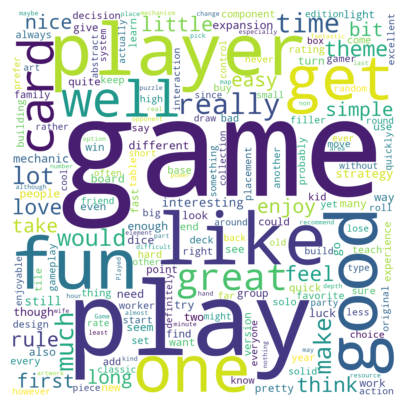

In [ ]:
# Generate a word cloud from the token frequencies
wordcloud = WordCloud(width=1600, height=1600,
                      background_color='white',
                      min_font_size=10).generate_from_frequencies(token_counts)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to a file (adjust the filename and format as needed)
# wordcloud.to_file("wordcloud_all_df.png")

C:\Users\Gaea\anaconda3\envs\textparse\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


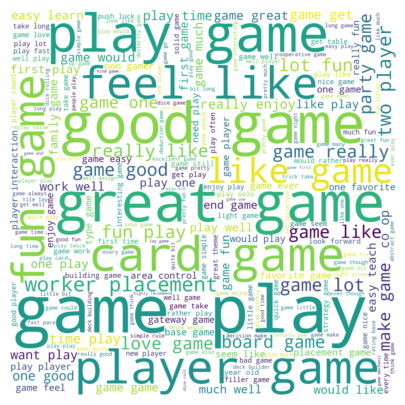

In [ ]:
# Generate a word cloud from the ngram frequencies
wordcloud = WordCloud(width=1600, height=1600,
                      background_color='white',
                      min_font_size=10).generate_from_frequencies(bigram_counts)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to a file (adjust the filename and format as needed)
# wordcloud.to_file("wordcloud_all_df_bigram.png")

C:\Users\Gaea\anaconda3\envs\textparse\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


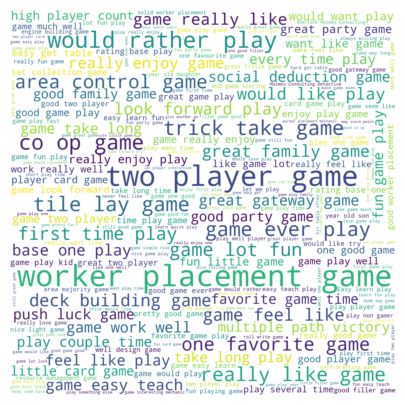

In [ ]:
# Generate a word cloud from the ngram frequencies
wordcloud = WordCloud(width=1600, height=1600,
                      background_color='white',
                      min_font_size=10).generate_from_frequencies(trigram_counts)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to a file (adjust the filename and format as needed)
# wordcloud.to_file("wordcloud_all_df_trigram.png")

### Low Reviews

C:\Users\Gaea\anaconda3\envs\textparse\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


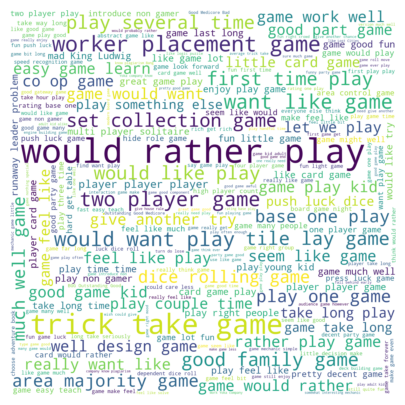

In [ ]:
# Generate a word cloud from the token frequencies
wordcloud = WordCloud(width=1600, height=1600,
                      background_color='white',
                      min_font_size=10).generate_from_frequencies(trigram_counts_low)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud to a file (adjust the filename and format as needed)
wordcloud.to_file("wordcloud_low_df_trigram.png")

In [ ]:
# # Function to get the top N important words from the vectorized data
# def get_top_words(vectorized_data, vectorizer, n=10):
#     feature_names = vectorizer.get_feature_names_out()
#     sum_words = vectorized_data.sum(axis=0)
#     words_freq = [(word, sum_words[0, idx])
#                   for word, idx in zip(feature_names,
#                                        range(sum_words.shape[1]))]

#     words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
#     top_words = words_freq[:n]
#     return top_words

# # Get the top N important words from TF-IDF Vectorizer and Count Vectorizer
# top_words_tfidf = get_top_words(positive_tfidf_vectorized, tfidf_vectorizer, n=10)
# top_words_count = get_top_words(positive_count_vectorized, count_vectorizer, n=10)

# # Create dataframes for the top words
# top_words_tfidf_df = pd.DataFrame(top_words_tfidf,
#                                   columns=['Word', 'TF-IDF Score'])

# top_words_count_df = pd.DataFrame(top_words_count,
#                                   columns=['Word', 'Count Vectorizer Score'])

# # Plot bar charts for the top words
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# sns.barplot(x='TF-IDF Score', y='Word', data=top_words_tfidf_df, color='skyblue')
# plt.title('Top Words from TF-IDF Vectorizer')
# plt.xlabel('TF-IDF Score')

# plt.subplot(1, 2, 2)
# sns.barplot(x='Count Vectorizer Score', y='Word', data=top_words_count_df, color='skyblue')
# plt.title('Top Words from Count Vectorizer')
# plt.xlabel('Count Vectorizer Score')

# plt.tight_layout()
# plt.show()

# Vectorize the text using TF-IDF Vectorizer

In [ ]:
sampled_df_en_ngram

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize,cleaned_lemmatize,bigram,trigram
7308,AmandaDesignsGames,8.0,A clever take on the Legacy trend (although co...,203427,Fabled Fruit,en,"['A', 'clever', 'take', 'on', 'the', 'Legacy',...","['clever', 'take', 'Legacy', 'trend', 'althoug...","['clever', 'take', 'Legacy', 'trend', 'althoug...","[clever, take, Legacy, trend, although, comple...","[clever take, take Legacy, Legacy trend, trend...","[clever take Legacy, take Legacy trend, Legacy..."
5309,Hugin,8.0,A good game to have to diversify your game typ...,2987,Pirate's Cove,en,"['A', 'good', 'game', 'to', 'have', 'to', 'div...","['good', 'game', 'diversify', 'game', 'types',...","['good', 'game', 'diversify', 'game', 'type', ...","[good, game, diversify, game, type, contain, f...","[good game, game diversify, diversify game, ga...","[good game diversify, game diversify game, div..."
525,RodJohnsonSays,8.0,"Great party game. Quick, easy to learn, easy t...",155362,Ca$h 'n Guns (Second Edition),en,"['Great', 'party', 'game', '.', 'Quick', ',', ...","['Great', 'party', 'game', 'Quick', 'easy', 'l...","['great', 'party', 'game', 'Quick', 'easy', 'l...","[great, party, game, Quick, easy, learn, easy,...","[great party, party game, game Quick, Quick ea...","[great party game, party game Quick, game Quic..."
5746,pulla,5.0,Though I appreciate the art-mocking part I dis...,118,Modern Art,en,"['Though', 'I', 'appreciate', 'the', 'art', '-...","['Though', 'appreciate', 'art', 'mocking', 'pa...","['though', 'appreciate', 'art', 'mock', 'part'...","[though, appreciate, art, mock, part, dislike,...","[though appreciate, appreciate art, art mock, ...","[though appreciate art, appreciate art mock, a..."
2755,metonymo,4.0,"The game is straightforward, has a feel of pro...",98527,Gloom of Kilforth: A Fantasy Quest Game,en,"['The', 'game', 'is', 'straightforward', ',', ...","['game', 'straightforward', 'feel', 'progressi...","['game', 'straightforward', 'feel', 'progressi...","[game, straightforward, feel, progression, exc...","[game straightforward, straightforward feel, f...","[game straightforward feel, straightforward fe..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2790,Rojack,5.0,There is nothing special about this game. Play...,25613,Through the Ages: A Story of Civilization,en,"['There', 'is', 'nothing', 'special', 'about',...","['nothing', 'special', 'game', 'Played', 'seve...","['nothing', 'special', 'game', 'play', 'severa...","[nothing, special, game, play, several, time, ...","[nothing special, special game, game play, pla...","[nothing special game, special game play, game..."
7696,Riffteria,9.0,Buyed it for my Gf with Europe expansion. Stay...,266192,Wingspan,en,"['Buyed', 'it', 'for', 'my', 'Gf', 'with', 'Eu...","['Buyed', 'Gf', 'Europe', 'expansion', 'Stayed...","['Buyed', 'Gf', 'Europe', 'expansion', 'Stayed...","[Buyed, Gf, Europe, expansion, Stayed, geniali...","[Buyed Gf, Gf Europe, Europe expansion, expans...","[Buyed Gf Europe, Gf Europe expansion, Europe ..."
74,Loodlood,4.0,This game reminds me of the type of game we us...,82222,Xia: Legends of a Drift System,en,"['This', 'game', 'reminds', 'me', 'of', 'the',...","['game', 'reminds', 'type', 'game', 'used', 'd...","['game', 'remind', 'type', 'game', 'use', 'des...","[game, remind, type, game, use, design, oursel...","[game remind, remind type, type game, game use...","[game remind type, remind type game, type game..."
6320,Rakuso,3.5,I start to like it less the more I play it. It...,244521,The Quacks of Quedlinburg,en,"['I', 'start', 'to', 'like', 'it', 'less', 'th...","['start', 'like', 'less', 'play', 'quick', 'ga...","['start', 'like', 'less', 'play', 'quick', 'ga...","[start, like, less, play, quick, game, luck, b...","[start like, like less, less play, play quick,...","[start like less, like less play, less play qu..."


In [ ]:
# process n-grams
sampled_df_en_ngram['processed_bigrams'] = sampled_df_en_ngram['bigram'].apply(lambda x: ' '.join('_'.join(pair.split()) for pair in x))
sampled_df_en_ngram['processed_trigrams'] = sampled_df_en_ngram['trigram'].apply(lambda x: ', '.join('_'.join(trigram.split()) for trigram in x))
sampled_df_en_ngram.head()

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize,cleaned_lemmatize,bigram,trigram,processed_bigrams,processed_trigrams
7308,AmandaDesignsGames,8.0,A clever take on the Legacy trend (although co...,203427,Fabled Fruit,en,"['A', 'clever', 'take', 'on', 'the', 'Legacy',...","['clever', 'take', 'Legacy', 'trend', 'althoug...","['clever', 'take', 'Legacy', 'trend', 'althoug...","[clever, take, Legacy, trend, although, comple...","[clever take, take Legacy, Legacy trend, trend...","[clever take Legacy, take Legacy trend, Legacy...",clever_take take_Legacy Legacy_trend trend_alt...,"clever_take_Legacy, take_Legacy_trend, Legacy_..."
5309,Hugin,8.0,A good game to have to diversify your game typ...,2987,Pirate's Cove,en,"['A', 'good', 'game', 'to', 'have', 'to', 'div...","['good', 'game', 'diversify', 'game', 'types',...","['good', 'game', 'diversify', 'game', 'type', ...","[good, game, diversify, game, type, contain, f...","[good game, game diversify, diversify game, ga...","[good game diversify, game diversify game, div...",good_game game_diversify diversify_game game_t...,"good_game_diversify, game_diversify_game, dive..."
525,RodJohnsonSays,8.0,"Great party game. Quick, easy to learn, easy t...",155362,Ca$h 'n Guns (Second Edition),en,"['Great', 'party', 'game', '.', 'Quick', ',', ...","['Great', 'party', 'game', 'Quick', 'easy', 'l...","['great', 'party', 'game', 'Quick', 'easy', 'l...","[great, party, game, Quick, easy, learn, easy,...","[great party, party game, game Quick, Quick ea...","[great party game, party game Quick, game Quic...",great_party party_game game_Quick Quick_easy e...,"great_party_game, party_game_Quick, game_Quick..."
5746,pulla,5.0,Though I appreciate the art-mocking part I dis...,118,Modern Art,en,"['Though', 'I', 'appreciate', 'the', 'art', '-...","['Though', 'appreciate', 'art', 'mocking', 'pa...","['though', 'appreciate', 'art', 'mock', 'part'...","[though, appreciate, art, mock, part, dislike,...","[though appreciate, appreciate art, art mock, ...","[though appreciate art, appreciate art mock, a...",though_appreciate appreciate_art art_mock mock...,"though_appreciate_art, appreciate_art_mock, ar..."
2755,metonymo,4.0,"The game is straightforward, has a feel of pro...",98527,Gloom of Kilforth: A Fantasy Quest Game,en,"['The', 'game', 'is', 'straightforward', ',', ...","['game', 'straightforward', 'feel', 'progressi...","['game', 'straightforward', 'feel', 'progressi...","[game, straightforward, feel, progression, exc...","[game straightforward, straightforward feel, f...","[game straightforward feel, straightforward fe...",game_straightforward straightforward_feel feel...,"game_straightforward_feel, straightforward_fee..."


In [ ]:
%%time
# Flatten the list of cleaned lemmatize entries and convert it to strings
all_texts = [' '.join(map(str, sublist)) for sublist in sampled_df_en_ngram['cleaned_lemmatize']]

CPU times: total: 31.2 ms
Wall time: 10 ms


In [ ]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=25)

# Fit and transform the vectorizer on the combined text
tfidf_matrix = vectorizer.fit_transform(all_texts)

# Convert the TF-IDF matrix to a DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                        columns=vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
tfidf_df.head()

,card,easy,feel,fun,game,get,good,great,like,little,...,one,play,player,really,rule,theme,think,time,well,would
0,0.00000,0.000000,0.000000,0.000000,0.510353,0.0,0.000000,0.000000,0.0,0.0,...,0.514095,0.350207,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.29879,0.000000,0.000000,0.497201,0.539303,0.0,0.254011,0.000000,0.0,0.0,...,0.000000,0.555109,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.00000,0.797844,0.000000,0.286254,0.155247,0.0,0.000000,0.325751,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.388957,0.0,0.0,0.0,0.0
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.733706,0.000000,0.283691,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.617409,0.0,0.000000,0.0,0.0,0.0,0.0


# Apply LatentDirichletAllocation

In [ ]:
%%time
from sklearn.decomposition import LatentDirichletAllocation

# Build a Latent Dirichlet Allocation Model 179seconds for 200k comments
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_Z = lda_model.fit_transform(tfidf_matrix)

CPU times: total: 5.19 s
Wall time: 5.2 s


In [ ]:
lda_model.score(tfidf_matrix) # coherence score

-52208.837178121146

In [ ]:
%%time
lda_model.perplexity(tfidf_matrix) # perplexity score

CPU times: total: 500 ms
Wall time: 498 ms


65.94968516780847

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [5, 8, 10, 12, 15]}

# Init the Model
lda = LatentDirichletAllocation(random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tfidf_matrix)

CPU times: total: 1min 46s
Wall time: 1min 47s


GridSearchCV(estimator=LatentDirichletAllocation(random_state=0),
             param_grid={'n_components': [5, 8, 10, 12, 15]})

In [ ]:
%%time
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood / Coherence Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tfidf_matrix))

Best Model's Params:  {'n_components': 5}
Best Log Likelihood / Coherence Score:  -9553.553674258888
Model Perplexity:  42.16593037923381
CPU times: total: 516 ms
Wall time: 511 ms


Inspect the topics in the feature space to determine a theme

In [ ]:
%%time
# Feed the LDA model into the pyLDAvis instance
panel = pyLDAvis.lda_model.prepare(best_lda_model, tfidf_matrix, vectorizer, mds='tsne', sort_topics=False)
pyLDAvis.display(panel)

CPU times: total: 922 ms
Wall time: 2.26 s


## Bigrams

In [ ]:
# Create a TF-IDF vectorizer
vectorizer_bi = TfidfVectorizer(max_features=25)

# Fit and transform the vectorizer on the combined text
tfidf_matrix_bi = vectorizer_bi.fit_transform(sampled_df_en_ngram['processed_bigrams'])

# Convert the TF-IDF matrix to a DataFrame (optional)
tfidf_df_bigrams = pd.DataFrame(tfidf_matrix_bi.toarray(),
                        columns=vectorizer_bi.get_feature_names_out())

# Display the TF-IDF DataFrame
tfidf_df_bigrams

,board_game,card_game,co_op,easy_learn,feel_like,fun_game,fun_play,game_good,game_like,game_lot,...,like_game,lot_fun,love_game,make_game,party_game,play_game,player_game,really_like,two_player,worker_placement
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.616589,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.705787,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.708424,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7840,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7841,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7842,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
%%time
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_Z = lda_model.fit_transform(tfidf_matrix_bi)

CPU times: total: 2.28 s
Wall time: 2.29 s


In [ ]:
lda_model.score(tfidf_matrix_bi) # coherence score

-10527.105987182178

In [ ]:
lda_model.perplexity(tfidf_matrix_bi) # perplexity score

35.03080264617057

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

# Define Search Param
# search_params = {'n_components': [5, 8, 10, 12, 15]} #defined above

# Init the Model
lda = LatentDirichletAllocation(random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tfidf_matrix_bi)

CPU times: total: 47.3 s
Wall time: 47.4 s


GridSearchCV(estimator=LatentDirichletAllocation(random_state=0),
             param_grid={'n_components': [5, 8, 10, 12, 15]})

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood / Coherence Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tfidf_matrix_bi))

Best Model's Params:  {'n_components': 5}
Best Log Likelihood / Coherence Score:  -2156.9579530143737
Model Perplexity:  30.912573644101254


Inspect the topics in the feature space to determine a theme

In [ ]:
# Feed the LDA model into the pyLDAvis instance
panel = pyLDAvis.lda_model.prepare(best_lda_model, tfidf_matrix_bi, vectorizer_bi, mds='tsne', sort_topics=False)
pyLDAvis.display(panel)

In [ ]:
import pickle
from gensim.models import LdaModel

# Assuming 'best_lda_model' is your trained LDA model
# You may need to adjust the filename and file path
filename = 'lda_model_7k_bigram.pkl'

# Save the LDA model to a file
with open(filename, 'wb') as file:
    pickle.dump(best_lda_model, file)

# Later, to load the model back
# with open(filename, 'rb') as file:
#     loaded_lda_model = pickle.load(file)

## Trigrams

In [ ]:
# Create a TF-IDF vectorizer
vectorizer_tri = TfidfVectorizer(max_features=25)

# Fit and transform the vectorizer on the combined text
tfidf_matrix_tri = vectorizer_tri.fit_transform(sampled_df_en_ngram['processed_trigrams'])

# Convert the TF-IDF matrix to a DataFrame (optional)
tfidf_df_trigrams = pd.DataFrame(tfidf_matrix_tri.toarray(),
                        columns=vectorizer_tri.get_feature_names_out())

# Display the TF-IDF DataFrame
tfidf_df_trigrams

,area_control_game,base_one_play,co_op_game,deck_building_game,feel_like_play,first_time_play,game_easy_learn,game_easy_teach,game_ever_play,game_feel_like,...,look_forward_play,one_favorite_game,really_enjoy_game,really_like_game,tile_lay_game,trick_take_game,two_player_game,worker_placement_game,would_like_play,would_rather_play
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_Z = lda_model.fit_transform(tfidf_matrix_tri)

In [ ]:
lda_model.score(tfidf_matrix_tri) # coherence score

-1889.8625487958277

In [ ]:
lda_model.perplexity(tfidf_matrix_tri) # perplexity score

32.978800292279374

In [ ]:
%%time

# Define Search Param
# search_params = {'n_components': [10, 15, 20, 25, 30]} #

# Init the Model
lda = LatentDirichletAllocation(random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tfidf_matrix_tri)

CPU times: total: 43 s
Wall time: 43.1 s


GridSearchCV(estimator=LatentDirichletAllocation(random_state=0),
             param_grid={'n_components': [5, 8, 10, 12, 15]})

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood / Coherence Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tfidf_matrix_tri))

Best Model's Params:  {'n_components': 5}
Best Log Likelihood / Coherence Score:  -453.4068410381395
Model Perplexity:  30.406274258296563


Inspect the topics in the feature space to determine a theme

In [ ]:
# Feed the LDA model into the pyLDAvis instance
panel = pyLDAvis.lda_model.prepare(best_lda_model, tfidf_matrix_tri, vectorizer_tri, mds='tsne', sort_topics=False)
pyLDAvis.display(panel)

## Topic Labelling

In [ ]:
topics=['coop',
        'family',
        'complexity',
        'teachable',
        'sentiment',
        ]

In [ ]:
#Load files
senti = pd.read_csv('E:/Documents/Google Drive/Eskwelabs/Sprint 4/Group_6_Team_Siomai_Rice/Sprint 4 Project/datasets/sentiment_analysis_textblob_vader.csv')

In [ ]:
import pickle
# Load the LDA model from the pickle file
with open('E:/Documents/Google Drive/Eskwelabs/Sprint 4/Group_6_Team_Siomai_Rice/Sprint 4 Project/lda_model_7k.pkl', 'rb') as file:
    lda_model = pickle.load(file)

In [ ]:
# Check contents of lda_model
print("Number of topics:", lda_model.n_components)
print("Number of iterations:", lda_model.n_iter)
print("Random state:", lda_model.random_state)

Number of topics: 5


AttributeError: 'LatentDirichletAllocation' object has no attribute 'n_iter'

In [ ]:
# Transform the 'comments' column using the trained vectorizer
dtm = vectorizer.transform(senti['comment'])

# Assign topics to comments
topic_predictions = lda_model.transform(dtm)

# Get the dominant topic for each comment and map to topic names
senti['predicted_topic'] = topic_predictions.argmax(axis=1)
senti['predicted_topic'] = senti['predicted_topic'].map(lambda x: topics[x])

In [ ]:
senti

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize,rule_patterns_sentiment,compound,sentiment,predicted_topic
0,acolyte,9.0,I think this is the game I wanted Defenders of...,127398,Legends of Andor,en,"['I', 'think', 'this', 'is', 'the', 'game', 'I...","['think', 'game', 'wanted', 'Defenders', 'Real...","['think', 'game', 'want', 'Defenders', 'Realm'...",Positive,0.2960,positive,family
1,Franchot,2.0,Dull and boring to play. Player interaction is...,148228,Splendor,en,"['Dull', 'and', 'boring', 'to', 'play', '.', '...","['Dull', 'boring', 'play', 'Player', 'interact...","['dull', 'boring', 'play', 'Player', 'interact...",Negative,-0.7527,negative,num-players
2,Feijee,10.0,Best gaming experience of my life!,161936,Pandemic Legacy: Season 1,en,"['Best', 'gaming', 'experience', 'of', 'my', '...","['Best', 'gaming', 'experience', 'life']","['good', 'gaming', 'experience', 'life']",Positive,0.6696,positive,num-players
3,bluebright,8.0,"Enjoyable battle game, still fun with only 2 p...",70323,King of Tokyo,en,"['Enjoyable', 'battle', 'game', ',', 'still', ...","['Enjoyable', 'battle', 'game', 'still', 'fun'...","['enjoyable', 'battle', 'game', 'still', 'fun'...",Positive,0.5574,positive,complexity
4,PsyenceFyction,9.5,This is probably one of my most favorite games...,131357,Coup,en,"['This', 'is', 'probably', 'one', 'of', 'my', ...","['probably', 'one', 'favorite', 'games', 'ever...","['probably', 'one', 'favorite', 'game', 'ever'...",Positive,0.5039,positive,family
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,operamang,8.0,LAST PLAY: Apr 2017 Started introducing this ...,10206,Make 'n' Break,en,"['LAST', 'PLAY', ':', 'Apr', '2017', ' ', 'Sta...","['LAST', 'PLAY', 'Apr', 'Started', 'introducin...","['last', 'play', 'Apr', 'start', 'introduce', ...",Positive,0.7358,positive,complexity
7840,Jumpman78,8.0,Sushi Go goes to the next level with tons of n...,192291,Sushi Go Party!,en,"['Sushi', 'Go', 'goes', 'to', 'the', 'next', '...","['Sushi', 'Go', 'goes', 'next', 'level', 'tons...","['Sushi', 'Go', 'go', 'next', 'level', 'ton', ...",Positive,0.7783,positive,family
7841,Silverleaf,10.0,One of the best Solitaire systems available an...,1608,Ambush!,en,"['One', 'of', 'the', 'best', 'Solitaire', 'sys...","['One', 'best', 'Solitaire', 'systems', 'avail...","['one', 'good', 'solitaire', 'system', 'availa...",Positive,0.9726,positive,teachable
7842,skraem,6.5,"3+ Plays. Decent game. Nice puzzle, decent g...",169426,Roll Player,en,"['3', '+', 'Plays', '.', ' ', 'Decent', 'game'...","['Plays', 'Decent', 'game', 'Nice', 'puzzle', ...","['play', 'Decent', 'game', 'Nice', 'puzzle', '...",Positive,-0.2853,negative,num-players


In [ ]:
# export to csv
# senti.to_csv('senti_with_predictions.csv', index=False)

## Trigram LDA for Low Reviews

In [ ]:
sampled_df_low['processed_trigrams'] = sampled_df_low['trigram'].apply(lambda x: ', '.join('_'.join(trigram.split()) for trigram in x))
sampled_df_low.head()

,user,rating,comment,ID,name,lang,spacy_tokens,tokens_preprocess,spacy_lemmatize,cleaned_lemmatize,bigram,trigram,processed_trigrams
1920,ob1_kenobi18,6.0,The separate games (Mad King Ludwig and Betwee...,258036,Between Two Castles of Mad King Ludwig,en,"['The', 'separate', 'games', '(', 'Mad', 'King...","['separate', 'games', 'Mad', 'King', 'Ludwig',...","['separate', 'game', 'mad', 'King', 'Ludwig', ...","[separate, game, mad, King, Ludwig, two, city,...","[separate game, game mad, mad King, King Ludwi...","[separate game mad, game mad King, mad King Lu...","separate_game_mad, game_mad_King, mad_King_Lud..."
617,bard,6.0,Can be mindless as you are trying to quickly g...,74,Apples to Apples,en,"['Can', 'be', 'mindless', 'as', 'you', 'are', ...","['mindless', 'trying', 'quickly', 'get', 'card...","['mindless', 'trying', 'quickly', 'get', 'card...","[mindless, trying, quickly, get, card, often, ...","[mindless trying, trying quickly, quickly get,...","[mindless trying quickly, trying quickly get, ...","mindless_trying_quickly, trying_quickly_get, q..."
593,barnyams36,2.0,It is just a modification of one of those very...,85250,The Dwarf King,en,"['It', 'is', 'just', 'a', 'modification', 'of'...","['modification', 'one', 'classical', 'card', '...","['modification', 'one', 'classical', 'card', '...","[modification, one, classical, card, game, fol...","[modification one, one classical, classical ca...","[modification one classical, one classical car...","modification_one_classical, one_classical_card..."
1240,PivitHero,6.0,I was expecting to like it more from all the g...,221965,The Fox in the Forest,en,"['I', 'was', 'expecting', 'to', 'like', 'it', ...","['expecting', 'like', 'good', 'things', 'heard...","['expect', 'like', 'good', 'thing', 'hear', 'l...","[expect, like, good, thing, hear, like, trick,...","[expect like, like good, good thing, thing hea...","[expect like good, like good thing, good thing...","expect_like_good, like_good_thing, good_thing_..."
1424,Meloonie,6.0,Fun but definitely not balanced between the ro...,198454,When I Dream,en,"['Fun', 'but', 'definitely', 'not', 'balanced'...","['Fun', 'definitely', 'balanced', 'roles', 'Ne...","['fun', 'definitely', 'balanced', 'role', 'nee...","[fun, definitely, balanced, role, need, right,...","[fun definitely, definitely balanced, balanced...","[fun definitely balanced, definitely balanced ...","fun_definitely_balanced, definitely_balanced_r..."


In [ ]:
# Create a TF-IDF vectorizer
vectorizer_tri = TfidfVectorizer(max_features=25)

# Fit and transform the vectorizer on the combined text
tfidf_matrix_tri = vectorizer_tri.fit_transform(sampled_df_low['processed_trigrams'])

# Convert the TF-IDF matrix to a DataFrame (optional)
tfidf_df_trigrams = pd.DataFrame(tfidf_matrix_tri.toarray(),
                        columns=vectorizer_tri.get_feature_names_out())

# Display the TF-IDF DataFrame
tfidf_df_trigrams

,area_majority_game,base_one_play,co_op_game,dice_rolling_game,first_time_play,game_feel_like,game_might_well,game_work_well,good_family_game,good_game_kid,...,really_want_like,set_collection_game,tile_lay_game,trick_take_game,two_player_game,want_like_game,worker_placement_game,would_like_play,would_rather_play,would_want_play
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.732836,0.0,0.000000,0.0,0.0,0.680405,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.722018,0.0,0.0,0.000000,0.0,0.691874,0.0,0.0,0.000000,0.0


In [ ]:
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_Z = lda_model.fit_transform(tfidf_matrix_tri)

In [ ]:
lda_model.score(tfidf_matrix_tri) # coherence score

-602.0620881851889

In [ ]:
lda_model.perplexity(tfidf_matrix_tri) # perplexity score

52.71002288588265

In [ ]:
%%time

# Define Search Param
# search_params = {'n_components': [10, 15, 20, 25, 30]} #

# Init the Model
lda = LatentDirichletAllocation(random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tfidf_matrix_tri)

CPU times: total: 11.9 s
Wall time: 12 s


GridSearchCV(estimator=LatentDirichletAllocation(random_state=0),
             param_grid={'n_components': [5, 8, 10, 12, 15]})

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood / Coherence Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tfidf_matrix_tri))

Best Model's Params:  {'n_components': 5}
Best Log Likelihood / Coherence Score:  -169.1277090164599
Model Perplexity:  44.902131337518895


Inspect the topics in the feature space to determine a theme

In [ ]:
# Feed the LDA model into the pyLDAvis instance
panel = pyLDAvis.lda_model.prepare(best_lda_model, tfidf_matrix_tri, vectorizer_tri, mds='tsne', sort_topics=False)
pyLDAvis.display(panel)

# [ARCHIVED] Text Pre-processing

## Translate non-english comments to English

In [ ]:
## Set your OpenAI API key
openai.api_key = getpass.getpass()
SKLLMConfig.set_openai_key(openai.api_key)

 ········


In [ ]:
# Test API call
response = openai.Completion.create(
  engine="text-davinci-003",
  prompt="Hello, OpenAI!",
  max_tokens=5
)

# Check if the API call was successful
if 'choices' in response and len(response['choices']) > 0:
    print("API is working correctly!")
else:
    print("There was an issue with the API call. Check your setup.")
    print(response)


API is working correctly!


In [ ]:
# Helper function
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'en'

# Apply the language detection function to the 'verified_reviews'
sampled_df['lang'] = sampled_df['comment'].apply(detect_language)
sampled_df['lang'].value_counts()

lang
en    590
es     12
de      8
fr      6
da      6
cy      5
ca      5
no      5
it      4
pt      4
et      3
tl      3
hu      3
sv      3
pl      2
af      2
nl      2
sw      2
id      1
ja      1
fi      1
so      1
sq      1
tr      1
sl      1
ko      1
ro      1
Name: count, dtype: int64

In [ ]:
# segment and create copies separating english and non-english comments

sampled_df_en = sampled_df[sampled_df['lang']=='en'].copy()
sampled_df_non_en = sampled_df[sampled_df['lang']!='en'].copy()

In [ ]:
non_en_texts = sampled_df_non_en['comment'].tolist()
non_en_texts

['Es un euro bastante abatracto. Supuestamente se trata de conseguir crear rutas comerciales.. aunque el tema es bastante accesorio. Eso sí, es un autentico quema cerebros. Muy recomendable. --------------------------------- Al principio no me pareció gran cosa, pero una vez que le pillas, es un vicio. Dados, combos y rellenar areas de un mapa personal que tiene cada jugador. Tiene factor suerte, pero te puedes blindar contra ella escogiendo las acciones adecadas.  En cada turno haces puntos por todo. Se acaba en la orquilla de 140-2oo puntos. Nuy recomendable. ------------------------------------  Copia propia adquirida por wallapop a Roberto, de valladolid. Copia alemana, precintada. Versión antigua. Por 27,90 con gastos de envío incluidos. Precintado. Tenía ganas de tener este juego y al final me pudo el ansia. Debería haber comprado la versión chachi, pero bueno, el juego sigue siendo el mismo e igual de bueno, y el precio me parece correcto.',
 'お互い盤面の辺同士を桂馬飛びで結んでいく2人アブストラクトゲーム。プレ

In [ ]:
%%time
# Initialize the GPTTranslator and set output language to English
t = GPTTranslator(openai_model="gpt-3.5-turbo", output_language="English")

# Generate translations for the non-english reviews
translated_texts = t.fit_transform(non_en_texts)


sampled_df_non_en['comment_english'] = translated_texts
sampled_df_non_en

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [1:01:07<00:00, 43.66s/it]

CPU times: total: 1.67 s
Wall time: 1h 1min 7s


,user,rating,comment,ID,name,lang,comment_english
1787957,byfed,8.8,Es un euro bastante abatracto. Supuestamente s...,84876,The Castles of Burgundy,es,It's a pretty abstract euro. Supposedly it's a...
13299099,mulsanne25,6.2,お互い盤面の辺同士を桂馬飛びで結んでいく2人アブストラクトゲーム。プレイは囲碁っぽい感覚だっ...,949,Twixt,ja,A two-player abstract game where you connect t...
12981105,jpreston,7.0,"Quite fun, definite 'gambling' element, can be...",10997,Boomtown,no,"Quite fun, definite 'gambling' element, can be..."
1826556,donnywan,8.0,Have game mat.,148228,Splendor,sq,Have game mat.
8787371,Pharveys,10.0,KOREA,264220,Tainted Grail: The Fall of Avalon,hu,KOREA
...,...,...,...,...,...,...,...
10972732,Jorenas,7.0,PnP,170561,Valeria: Card Kingdoms,tl,PnP
8438903,cristobal333,6.5,Buen juego pero sigo sin encontrar un juego na...,188920,This War of Mine: The Board Game,es,Good game but I still can't find a narrative g...
11282201,Cillit_Bangarang,8.0,Van,148319,Tragedy Looper,et,Van
16528582,Chipsouille,7.0,Joué à l'asso Fumbles de Fontainebleau,285253,Fiesta de los Muertos,fr,Played at the Fumbles association in Fontaineb...


In [ ]:
# concatenate translated and non-translated comments to the english comment df in a 'comment_english' column

sampled_df_en['comment_english'] = sampled_df_en['comment']
sampled_df_translated = pd.concat([sampled_df_en, sampled_df_non_en], ignore_index=True)
sampled_df_translated.head()

,user,rating,comment,ID,name,lang,comment_english
0,islanderic,9.0,We aren't finished this game yet (currently in...,161936,Pandemic Legacy: Season 1,en,We aren't finished this game yet (currently in...
1,hmocc,5.0,Quick and fun card game.,432,6 nimmt!,en,Quick and fun card game.
2,mikecostanzo,8.0,"I like a lot about this game, like how the Opp...",137811,Galactic Strike Force,en,"I like a lot about this game, like how the Opp..."
3,ooogene,8.0,The gears aren't there just for looks. They ar...,126163,Tzolk'in: The Mayan Calendar,en,The gears aren't there just for looks. They ar...
4,NoFreetime,6.0,Was way to limited/simplistic for our tastes. ...,192334,Vikings on Board,en,Was way to limited/simplistic for our tastes. ...


In [ ]:
sampled_df_translated.shape

(674, 7)